In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import mygrad.F as F
from mygrad.engine import Variable
from mygrad.nn import Neuron, Linear, MLP

In [14]:
np.random.seed(1337)
random.seed(1337)

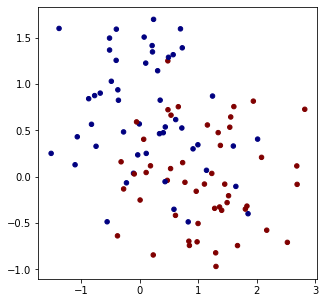

In [15]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.5)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [16]:
model = MLP(2, [16, 16, 1])

In [17]:
model

MLP of [Linear of [Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2)], Linear of [Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16)], Linear of [Neuron(16)]]

In [18]:
print("Number of Parameters", len(model.parameters()))

Number of Parameters 337


In [19]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y # use the entire dataset in every epoch

    else: 
        # create an array of shape X.shape[0] and get the first n(batch_size)
        ri = np.random.permutation(X.shape[0])[:batch_size] 
        Xb, yb = X[ri], y[ri]
    # list of arrs of length of 2 (2 inputs)
    inputs = [list(map(Variable, xrow)) for xrow in Xb]
    scores = list(map(model, inputs)) # pass inputs into model
    # svm max-margin loss
    losses = [F.relu(1 + -yi*scorei) for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # l2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    accuracy = [(yi > 0) == (scorei.value > 0) for yi, scorei in zip(yb, scores)]

    return total_loss, sum(accuracy) / len(accuracy)




In [20]:
total_loss, acc = loss()
print(total_loss, acc)

Variable(value=0.9345736778063741) 0.5


In [21]:
for k in range(100):
    total_loss, acc = loss()

    model.zero_grad()
    total_loss.backward()
    # update
    learning_rate = 1.0 - 0.9 * k / 100

    for p in model.parameters():
        p.value -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.value}, accuracy {acc*100}%")


step 0 loss 0.9345736778063741, accuracy 50.0%
step 1 loss 3.009554726795958, accuracy 62.0%
step 2 loss 1.974340857683913, accuracy 63.0%
step 3 loss 0.6658137428465747, accuracy 77.0%
step 4 loss 0.5284786283361484, accuracy 76.0%
step 5 loss 0.541748131512355, accuracy 77.0%
step 6 loss 0.5934707383288188, accuracy 77.0%
step 7 loss 0.5211157981371148, accuracy 77.0%
step 8 loss 0.510705643659373, accuracy 78.0%
step 9 loss 0.5065810504412325, accuracy 78.0%
step 10 loss 0.5070892308301271, accuracy 78.0%
step 11 loss 0.5246103685386684, accuracy 77.0%
step 12 loss 0.5166550311093769, accuracy 77.0%
step 13 loss 0.5624381774508778, accuracy 77.0%
step 14 loss 0.50621430910204, accuracy 77.0%
step 15 loss 0.4983414300942521, accuracy 78.0%
step 16 loss 0.495902778442583, accuracy 76.0%
step 17 loss 0.5247564063910873, accuracy 77.0%
step 18 loss 0.6091811221066559, accuracy 77.0%
step 19 loss 0.525333994746376, accuracy 76.0%
step 20 loss 0.5042322791812865, accuracy 77.0%
step 21 lo

(-1.9672535964732416, 2.532746403526758)

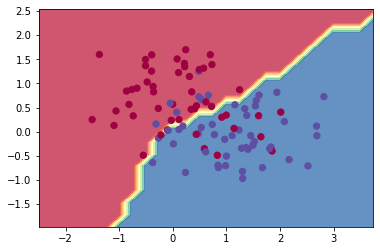

In [24]:

# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Variable, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.value > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
